In [4]:
#!pip install PennyLane
#!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu

  Using cached PennyLane-0.28.0-py3-none-any.whl (1.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 1.4 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached autograd-1.5-py3-none-any.whl (48 kB)
  Using cached retworkx-0.12.1-py3-none-any.whl (10 kB)
  Using cached autoray-0.6.0-py3-none-any.whl (46 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl (15 kB)
  Using cached ninja-1.11.1-py2.py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (145 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:01


In [1]:
#from sympy import conjugate
from torch.autograd import Variable
import torch
from rsvg import rsvg
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np
from tools import *
import sys
import pickle
import os
from pympler import asizeof



### Abaixo é as 4 celulas que foram usadas para gerar o gráfico

In [43]:
n_qubits = 4
depht = n_qubits + 1
circuit, params = vqa(n_qubits)
drawer = qml.draw(circuit)
n = 3*n_qubits*(1+depht)
params = random_params(n)
print(params)
#print(drawer(params))
# qml.draw((circuit)(params))

tensor([-4.2613e+00, -4.9572e-01,  1.6475e+00,  4.0169e-01, -2.2766e-01,
         2.5642e+00, -1.2987e+00,  1.6512e-01, -4.6974e-01, -1.5957e+00,
        -2.3880e+00, -2.1899e+00,  1.6161e+00, -5.7404e-04, -1.5587e+00,
        -4.7792e-01,  1.9977e+00,  1.1854e-01,  1.7010e+00, -1.6351e+00,
        -1.0929e+00,  5.8629e-01,  1.0146e+00, -1.9881e+00, -1.6773e+00,
         2.3611e+00,  3.5017e-01, -1.3489e+00,  2.1917e-01,  8.3292e-01,
        -4.5106e-01,  1.4244e+00, -9.7449e-01,  1.1195e+00,  1.2172e+00,
         2.5406e+00,  1.2950e+00, -3.8354e-01,  3.3640e-01,  7.1249e-01,
        -1.5319e+00,  1.2291e+00,  1.6838e+00, -9.2110e-02,  1.9486e+00,
        -2.5083e-01,  7.3687e-01,  1.3795e+00, -2.9217e+00, -8.2314e-01,
        -1.1143e+00, -8.4738e-01,  2.6103e-01,  3.7544e+00, -7.8026e-01,
         9.9970e-01,  5.5288e-01, -5.0688e-01,  6.5280e-01, -1.7379e+00,
        -2.3968e+00,  3.8577e-01,  4.8204e-01, -1.4256e+00, -1.2885e+00,
        -1.4820e+00, -1.7048e+00,  4.2192e-01, -6.5

In [38]:
n_qubits = 4
_ , target_op = init_state_rsvg(n_qubits)
print(target_op)


tensor([[ 0.0318+0.0000e+00j, -0.0403+7.7963e-03j, -0.0103+5.8959e-03j,
         -0.0411-9.3441e-02j, -0.0134+5.1215e-02j, -0.0353+4.2479e-03j,
          0.0533-3.2346e-02j, -0.0006-1.0473e-02j, -0.0057+3.0739e-02j,
         -0.0502+3.9638e-02j,  0.0243+3.6895e-03j,  0.0251+2.6836e-02j,
          0.0288-1.2777e-02j,  0.0064-3.1493e-02j,  0.0268-1.6939e-02j,
         -0.0196+2.2674e-03j],
        [-0.0403-7.7963e-03j,  0.0530+0.0000e+00j,  0.0145-4.9443e-03j,
          0.0292+1.2857e-01j,  0.0295-6.1656e-02j,  0.0458+3.2730e-03j,
         -0.0755+2.7927e-02j, -0.0018+1.3423e-02j,  0.0147-3.7587e-02j,
          0.0734-3.7932e-02j, -0.0298-1.0632e-02j, -0.0253-4.0192e-02j,
         -0.0396+9.1396e-03j, -0.0158+3.8362e-02j, -0.0382+1.4887e-02j,
          0.0255+1.9446e-03j],
        [-0.0103-5.8959e-03j,  0.0145+4.9443e-03j,  0.0044+0.0000e+00j,
         -0.0040+3.7973e-02j,  0.0138-1.4147e-02j,  0.0122+5.1691e-03j,
         -0.0233+6.0699e-04j, -0.0018+3.5091e-03j,  0.0075-8.9309e-03j,
  

In [8]:
n = 100
n_qubits = 1
epocas = 60
fidelidades = []
for i in range(0, n):
    circuit, params = vqa(n_qubits)
    target_vector, target_op = init_state_rsvg(n_qubits)
    best_params, f = train(epocas, circuit, params, target_op)
    fidelidades.append(f[-1])
    with open('Fidelidades_nqb-1.pkl', 'wb') as a:
        pickle.dump(fidelidades, a)

59 0.0
59 9.5367431640625e-07
59 1.232595164407831e-32
59 0.000186920166015625
59 0.00027561187744140994
59 8.583068847654949e-06
59 0.0
59 4.930380657631324e-32
59 1.52587890625e-05
59 9.536743164058163e-07
59 9.536743164058163e-07
59 0.0
59 1.52587890625e-05
59 8.58306884765625e-06
59 7.724761962890625e-05
59 9.536743164062717e-05
59 3.8146972656241326e-06
59 9.5367431640625e-07
59 1.52587890625e-05
59 4.673004150390777e-05
59 0.00018692016601562804
59 8.58306884765625e-06
59 9.5367431640625e-07
59 4.673004150390777e-05
59 3.814697265625e-06
59 9.5367431640625e-07
59 4.673004150390777e-05
59 2.3841857910157334e-05
59 1.5258789062500867e-05
59 1.52587890625e-05
59 3.814697265625e-06
59 0.00011539459228515148
59 8.5830688476569e-06
59 8.58306884765625e-06
59 0.0001611709594726506
59 1.52587890625e-05
59 1.232595164407831e-32
59 3.814697265626301e-06
59 1.5258789062498265e-05
59 1.5258789062498265e-05
59 8.58306884765625e-06
59 9.536743164064668e-07
59 1.232595164407831e-32
59 8.5830688

In [9]:
n = 100
n_qubits = 2
fidelidades = []
for i in range(0, n):
    circuit, params = vqa(n_qubits)
    target_vector, target_op = init_state_rsvg(n_qubits)
    best_params, f = train(60, circuit, params, target_op)
    fidelidades.append(f[-1])
    with open('Fidelidades_nqb-2.pkl', 'wb') as a:
        pickle.dump(fidelidades, a)

59 9.536743164058163e-07
59 3.814697265625434e-06
59 9.536743164058163e-07
59 9.536743164058163e-07
59 0.0001373291015624948
59 2.3841857910157334e-05
59 8.5830688476569e-06
59 4.673004150390625e-05
59 3.43322753906263e-05
59 4.673004150390625e-05
59 1.52587890625e-05
59 3.43322753906263e-05
59 3.4332275390625e-05
59 8.5830688476569e-06
59 2.384185791015408e-05
59 8.58306884765625e-06
59 1.525878906249653e-05
59 6.103515625e-05
59 8.58306884765625e-06
59 9.536743164062717e-05
59 0.0003814697265625
59 9.536743164062717e-05
59 3.8146972656241326e-06
59 8.58306884765625e-06
59 9.536743164062066e-05
59 4.930380657631324e-32
59 6.103515625000173e-05
59 2.384185791015625e-05
59 3.8146972656241326e-06
59 1.5258789062498265e-05
59 0.00011539459228516102
59 1.5258789062500867e-05
59 1.232595164407831e-32
59 3.814697265625e-06
59 9.536743164058163e-07
59 4.673004150390625e-05
59 3.814697265625e-06
59 7.724761962890625e-05
59 2.3841857910157334e-05
59 6.103515624999653e-05
59 0.000186920166015625

In [10]:
n = 100
n_qubits = 3
fidelidades = []
for i in range(0, n):
    circuit, params = vqa(n_qubits)
    target_vector, target_op = init_state_rsvg(n_qubits)
    best_params, f = train(60, circuit, params, target_op)
    fidelidades.append(f[-1])
    with open('Fidelidades_nqb-3.pkl', 'wb') as a:
        pickle.dump(fidelidades, a)

59 0.00011539459228515148
59 6.103515625e-05
59 2.3841857910157334e-05
59 9.536743164062066e-05
59 3.4332275390625e-05
59 9.536743164062717e-05
59 3.814697265625434e-06
59 0.0001373291015625026
59 9.5367431640625e-05
59 2.3841857910157334e-05
59 7.72476196289082e-05
59 9.536743164062066e-05
59 4.673004150390625e-05
59 0.0001373291015624896
59 3.43322753906263e-05
59 6.103515625000173e-05
59 6.103515624999653e-05
59 0.00011539459228515625
59 3.4332275390625e-05
59 0.00018692016601562804
59 3.814697265625434e-06
59 7.724761962890625e-05
59 2.3841857910157334e-05
59 3.43322753906224e-05
59 6.103515624999653e-05
59 3.43322753906289e-05
59 4.673004150390777e-05
59 6.103515624999653e-05
59 0.00011539459228515625
59 0.0001373291015624948
59 9.536743164062717e-05
59 3.43322753906224e-05
59 9.5367431640625e-05
59 9.536743164062717e-05
59 6.103515624999653e-05
59 8.58306884765625e-06
59 3.43322753906263e-05
59 3.43322753906289e-05
59 4.673004150390777e-05
59 4.673004150390777e-05
59 7.7247619628

In [6]:
n_qubits = 4
n = 100
fidelidades = []

for i in range(0, n):
    print(f'n = {i}')
    circuit, params = vqa(n_qubits)
    target_vector, target_op = init_state_rsvg(n_qubits)
    best_params, f = train(60, circuit, params, target_op)
    fidelidades.append(f[-1])
    with open('Fidelidades_nqb-4.pkl', 'wb') as a:
        pickle.dump(fidelidades, a)

os.system("shutdown now -h")

n = 0
59 0.00018692016601561286
n = 1
59 0.0001611709594726506
n = 2
59 0.00011539459228514671
n = 3
59 0.0003814697265625
n = 4
59 0.0001373291015625
n = 5
59 4.6730041503903214e-05
n = 6
59 0.0001373291015625026
n = 7
59 7.72476196289082e-05
n = 8
59 0.000644683837890625
n = 9
59 0.0003442764282226686
n = 10
59 0.0009164810180663928
n = 11
59 0.000308990478515625
n = 12
59 4.673004150390777e-05
n = 13
59 0.00024414062499999306
n = 14
59 9.536743164062717e-05
n = 15
59 0.0001611709594726506
n = 16
59 9.536743164062717e-05
n = 17
59 0.000186920166015625
n = 18
59 0.000461578369140625
n = 19
59 0.0001373291015625
n = 20
59 0.000186920166015625
n = 21
59 0.000461578369140625
n = 22
59 4.673004150390777e-05
n = 23
59 8.58306884765625e-06
n = 24
59 7.72476196289082e-05
n = 25
59 6.103515625000173e-05
n = 26
59 0.00046157836914062977
n = 27
59 0.00021457672119140625
n = 28
59 0.0002756118774413915
n = 29
59 0.0001373291015625
n = 30
59 4.673004150391232e-05
n = 31
59 6.103515625e-05
n = 32


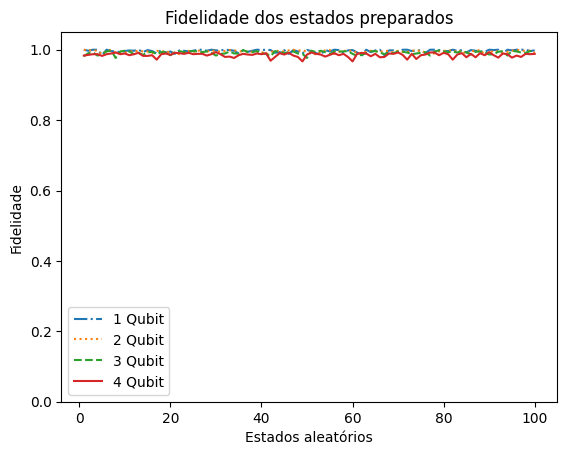

In [4]:
files =['Fidelidades_nqb-1.pkl', 'Fidelidades_nqb-2.pkl', 'Fidelidades_nqb-3.pkl', 'Fidelidades_nqb-4.pkl']
with open(files[0], 'rb') as f:
    y1 = pickle.load(f)
with open(files[1], 'rb') as f:
    y2 = pickle.load(f)
with open(files[2], 'rb') as f:
    y3 = pickle.load(f)
with open(files[3], 'rb') as f:
    y4 = pickle.load(f)

size = 100
x = np.linspace(1, size, size)
plt.plot(x, y1[0:size], label='1 Qubit', linestyle="dashdot")
plt.plot(x, y2[0:size], label='2 Qubit', linestyle=":")
plt.plot(x, y3[0:size], label='3 Qubit', linestyle="--")
plt.plot(x, y4[0:size], label='4 Qubit')
plt.title('Fidelidade dos estados preparados')
plt.ylim(0, 1.05)
plt.xlabel('Estados aleatórios')
plt.ylabel('Fidelidade')
plt.legend()
plt.savefig('1234qb.png')
plt.show()

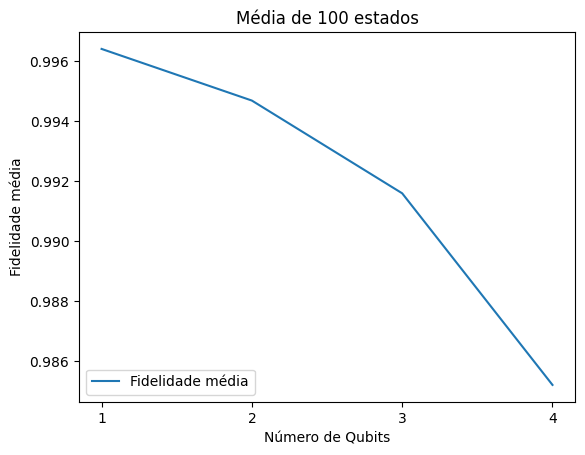

In [6]:
x = np.linspace(1,4,4)
fids = []
fids.append(sum(y1)/len(y1))
fids.append(sum(y2)/len(y2))
fids.append(sum(y3)/len(y3))
fids.append(sum(y4)/len(y4))
#x = np.linspace(0,len(fidelidades),len(fidelidades))
plt.plot(x,fids,label='Fidelidade média')
plt.title('Média de 100 estados')
plt.xlabel('Número de Qubits')
plt.ylabel('Fidelidade média')
#plt.ylim(0.5,1)
plt.legend(loc='lower left')
plt.xticks(range(1,5))
plt.savefig('fid_med.png')

plt.show()

# ----------------------------------------------

### Abaixo é a comparação de dois modelos diferentes para treinar um VQA para preparação de um estado de 4 qubits

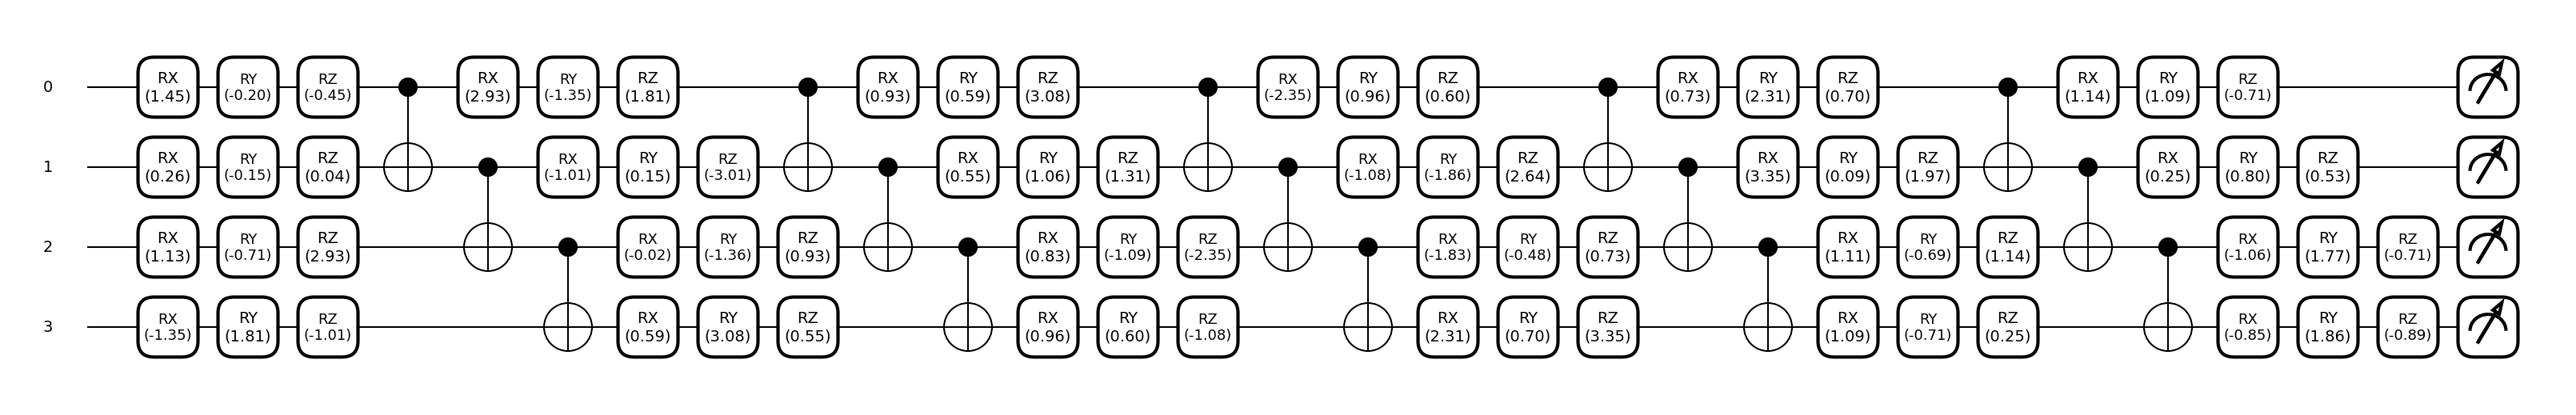

In [50]:
n_qubits = 4
fidelidades = []

#circuit, params = vqa_extra_cnot_depth5(n_qubits)
#target_vector, target_op = init_state_rsvg(n_qubits)
#fig, ax = qml.draw_mpl(circuit, decimals=2)(params, target_op)
#plt.show()
#best_params, f_extra_cnot, loss1 = train2(70, circuit, params, target_op)

circuit, params = vqa(n_qubits)
target_vector, target_op = init_state_rsvg(n_qubits)
fig, ax = qml.draw_mpl(circuit, decimals=2)(params, target_op)
plt.show()
#best_params, f, loss_extra = train2(70, circuit, params, target_op)


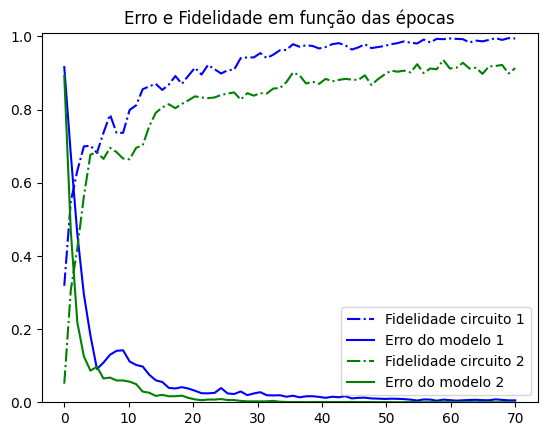

In [9]:
size = 70
x = np.linspace(0, size, size)

plt.plot(x, f,'b', label='Fidelidade circuito 1', linestyle="dashdot")
plt.plot(x, loss1,'b', label='Erro do modelo 1', linestyle="-")
plt.plot(x, f_extra_cnot,'g', label='Fidelidade circuito 2', linestyle="dashdot")
plt.plot(x, loss_extra,'g', label='Erro do modelo 2', linestyle="-")
plt.title('Erro e Fidelidade em função das épocas')
plt.ylim(0, 1.01)
plt.legend()
plt.show()


In [10]:
data = []
data.append(f)
data.append(loss1)
data.append(f_extra_cnot)
data.append(loss_extra)
caminho = 'data-circuit-comparison.pkl'
with open(caminho, 'wb') as z:
    pickle.dump(data, z)

In [4]:
n_qubits = 4
n = 1
fidelidades = []

for i in range(0, n):
    print(f'n = {i}')
    circuit, params = vqa_extra_cnot(n_qubits)
    target_vector, target_op = init_state_rsvg(n_qubits)
    best_params, f = train(35, circuit, params, target_op)
    fidelidades.append(f[-1])
    with open('Fidelidades_nqb-4_extra_cnot.pkl', 'wb') as a:
        pickle.dump(fidelidades, a)

n = 0
0 0.6793365478515625
1 0.5639657974243164
2 0.3992166519165039
3 0.29587650299072266
4 0.23937320709228516
5 0.14505386352539062
6 0.16109561920166016
7 0.13126468658447266
8 0.1121988296508789
9 0.07800674438476562
10 0.0625
11 0.06747817993164062
12 0.050449371337890625
13 0.0841226577758789
14 0.0644683837890625
15 0.08525943756103516
16 0.07212162017822266
17 0.08020401000976562
18 0.0710763931274414
19 0.06747817993164062
20 0.0669717788696289
21 0.047425270080566406
22 0.04449462890625
23 0.037011146545410156
24 0.036263465881347656
25 0.034427642822265625
26 0.029541015625
27 0.023807525634765625
28 0.028873443603515625
29 0.022912025451660156
30 0.023807525634765625
31 0.021744728088378906
32 0.015870094299316406
33 0.021172523498535156
34 0.014428138732910156
34 0.014428138732910156


In [5]:
with open('Fidelidades_nqb-4.pkl', 'rb') as f:
    fidelidades = pickle.load(f)
len(fidelidades)

38

In [10]:
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np
from tools import *
import sys
import pickle
#n_qubits = 1
n = 1
x = []
y1 = []
y2 = []


fide = []
fidelidades = []
for n_qubits in range(1, 5):
    for i in range(0, n):
        for depht in range(1,7):

            print(f' n = {i}, depht = {depht}')
            circuit, params = vqa(n_qubits,depht)
            target_vector, target_op = init_state_rsvg(n_qubits)
            best_params, f , loss = train2(1, circuit, params, target_op)
            print(max(f))
            fide.append(max(f))
    fidelidades.append(fide)
#   
#    x.append(n_qubits)
#    y1.append(fid_med)
#    y2.append(var)
#
#    print(f'variancia = {np.var(fidelidades)}')
#    print(f'fid_med = {fid_med}')
#
#print(x)
#print(y1)
#print(y2)



 n = 0, depht = 1
0.056640625000000014
 n = 0, depht = 2
0.5185546875000001
 n = 0, depht = 3
0.6044921875
 n = 0, depht = 4
0.3740234375
 n = 0, depht = 5
0.333984375
 n = 0, depht = 6
0.7353515625
 n = 0, depht = 1
0.18359375
 n = 0, depht = 2
0.30078125
 n = 0, depht = 3
0.8466796875
 n = 0, depht = 4
0.501953125
 n = 0, depht = 5
0.06152343750000002
 n = 0, depht = 6
0.10449218750000003
 n = 0, depht = 1
0.5693359375
 n = 0, depht = 2
0.06054687500000003
 n = 0, depht = 3
0.2656250000000001
 n = 0, depht = 4
0.4179687500000001
 n = 0, depht = 5
0.4648437499999999
 n = 0, depht = 6
0.5800781249999998
 n = 0, depht = 1
0.04687499999999997
 n = 0, depht = 2
0.28515625
 n = 0, depht = 3
0.0869140625
 n = 0, depht = 4
0.4462890624999999
 n = 0, depht = 5
0.3974609375000001
 n = 0, depht = 6
0.32421875


[[0.056640625000000014, 0.5185546875000001, 0.6044921875, 0.3740234375, 0.333984375, 0.7353515625, 0.18359375, 0.30078125, 0.8466796875, 0.501953125, 0.06152343750000002, 0.10449218750000003, 0.5693359375, 0.06054687500000003, 0.2656250000000001, 0.4179687500000001, 0.4648437499999999, 0.5800781249999998, 0.04687499999999997, 0.28515625, 0.0869140625, 0.4462890624999999, 0.3974609375000001, 0.32421875], [0.056640625000000014, 0.5185546875000001, 0.6044921875, 0.3740234375, 0.333984375, 0.7353515625, 0.18359375, 0.30078125, 0.8466796875, 0.501953125, 0.06152343750000002, 0.10449218750000003, 0.5693359375, 0.06054687500000003, 0.2656250000000001, 0.4179687500000001, 0.4648437499999999, 0.5800781249999998, 0.04687499999999997, 0.28515625, 0.0869140625, 0.4462890624999999, 0.3974609375000001, 0.32421875], [0.056640625000000014, 0.5185546875000001, 0.6044921875, 0.3740234375, 0.333984375, 0.7353515625, 0.18359375, 0.30078125, 0.8466796875, 0.501953125, 0.06152343750000002, 0.104492187500000

ValueError: x and y must have same first dimension, but have shapes (5,) and (24,)

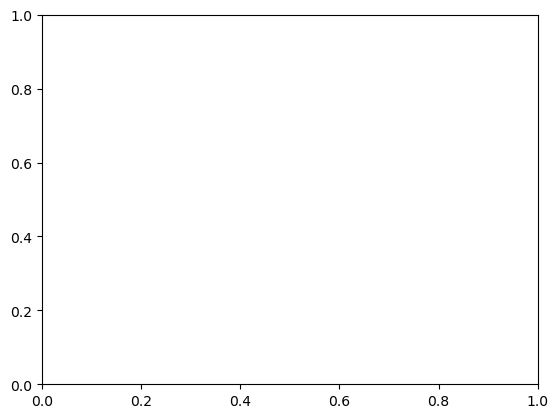

In [13]:
print(fidelidades)
print(len(fidelidades[0]))
x = np.linspace(1,5,5)
y1 = fidelidades[0]
y2 = fidelidades[1]
y3 = fidelidades[2]
y4 = fidelidades[3]


plt.plot(x, y1, label='depht = 1')
plt.plot(x, y2, label='depht = 2')
plt.plot(x, y3, label='depht = 3')
plt.plot(x, y4, label='depht = 3fid_med')
plt.legend()
plt.show()

In [7]:
with open('Fidelidades_nqb-4.pkl', 'rb') as f:
    mynewlist = pickle.load(f)
mynewlist

[0.2734375000000002, 0.396484375]

[1]
59 1.232595164407831e-32
59 0.00016117095947265907
59 4.930380657631324e-32
59 0.00011539459228515864
59 1.52587890625e-05
59 8.58306884765625e-06
59 0.0
59 4.673004150390625e-05
59 0.0
59 1.5258789062498265e-05
[1, 2]
59 2.384185791015408e-05
59 3.4332275390625e-05
59 4.6730041503903214e-05
59 0.0
59 3.43322753906224e-05
59 3.43322753906263e-05
59 7.72476196289082e-05
59 3.8146972656241326e-06
59 3.814697265626301e-06
59 2.384185791015625e-05
[1, 2, 3]
59 0.00024414062499999306
59 8.58306884765625e-06
59 1.525878906249653e-05
59 6.103515624999653e-05
59 3.814697265625434e-06
59 0.00021457672119139324
59 8.583068847654949e-06
59 9.536743164062717e-05
59 0.00016117095947265907
59 1.5258789062498265e-05
[1, 2, 3, 4]
59 9.5367431640625e-05
59 6.103515624999653e-05
59 0.00027561187744140625
59 0.00021457672119139974
59 7.724761962890235e-05
59 0.000186920166015625
59 0.0001373291015625
59 0.000344276428222648
59 0.0003089904785156172
59 0.00011539459228515864
Fidelidade =  0.9833984374

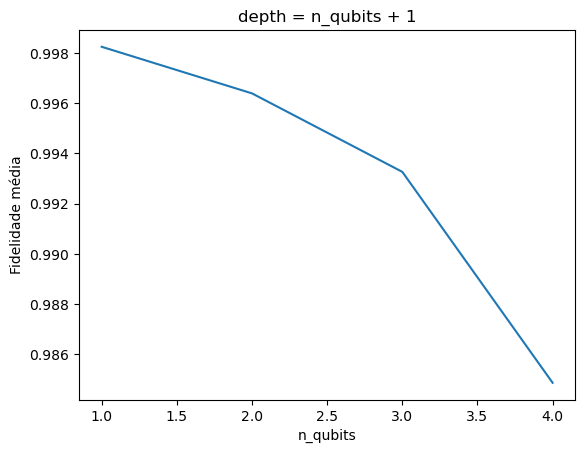

In [11]:


fidelidades = []
n_examples = 10
x = []
for m in range(1,5):
    x.append(m)
    fid = 0
    n_qubits = m
    depht = n_qubits + 1
    n = 3*n_qubits*(1+depht)
    for _ in range(n_examples):
        target_vector, alpha = init_state_rsvg(n_qubits)
        params = random_params(n)
        device = get_device(n_qubits)
        @qml.qnode(device, interface="torch")
        def circuit(params, M=None):
            w = []
            aux = 0
            for j in range(n_qubits):
                qml.RX(params[j+aux], wires=j)
                qml.RY(params[j+1+aux], wires=j)
                qml.RZ(params[j+2+aux], wires=j)
                w.append(j)
                aux+=2
            for z in range(depht):
                for i in range(n_qubits-1):
                    qml.CNOT(wires=[i,i+1])
                for j in range(n_qubits):
                    qml.RX(params[j+aux], wires=j)
                    qml.RY(params[j+1+aux], wires=j)
                    qml.RZ(params[j+2+aux], wires=j)
                    aux+=2
            return qml.expval(qml.Hermitian(M, wires=w))
        best_params, f = train(60, circuit, params, alpha)
        fid += fidelidade(circuit, best_params, alpha)
    fidelidades.append(fid/n_examples)
#x = np.linspace(0,len(fidelidades),len(fidelidades))
plt.plot(x,fidelidades)
plt.title('depth = n_qubits + 1')
print('Fidelidade = ',fidelidade(circuit, best_params, alpha))
plt.xlabel('n_qubits')
plt.ylabel('Fidelidade média')
plt.show()
#fig, ax = qml.draw_mpl(circuit, decimals=2)(params, alpha)
#plt.show()


# to do 
* calcular a variancia de cada estado preparado.
* escrever no documento os resultados obtidos até agora.


49 1.232595164407831e-32
Fidelidade =  0.9999999999999999


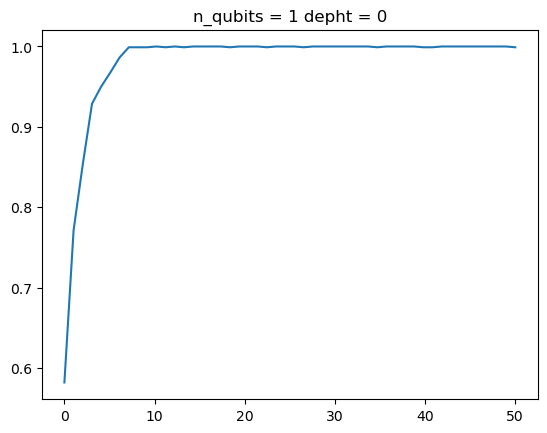

49 8.583068847654949e-06
Fidelidade =  0.9941406250000002


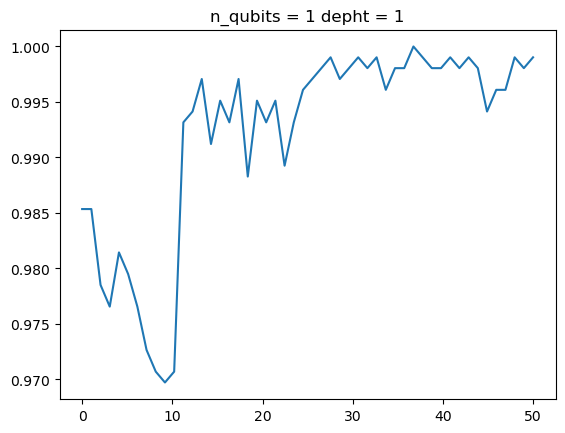

49 0.0
Fidelidade =  1.0


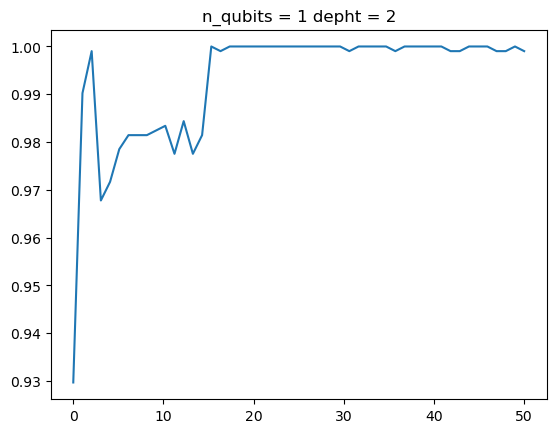

49 9.536743164064668e-07
Fidelidade =  0.9990234374999999


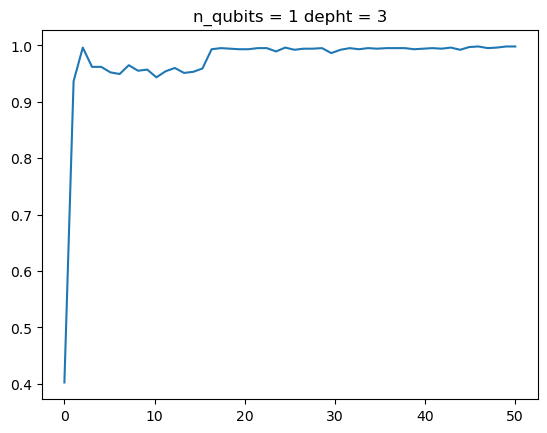

49 0.0005044937133789112
Fidelidade =  0.9755859374999999


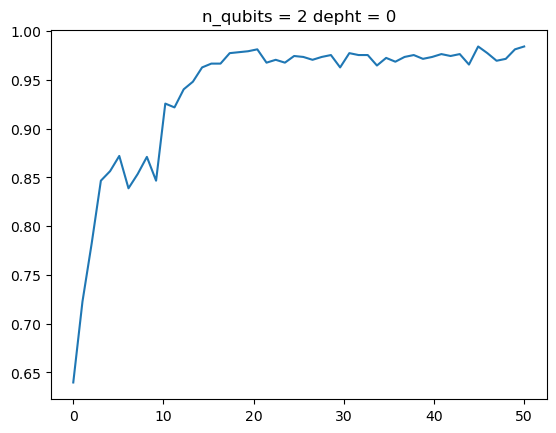

49 0.0011682510375976638
Fidelidade =  0.9941406249999999


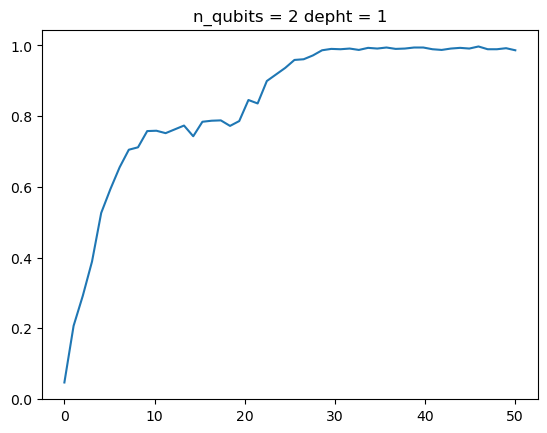

49 0.00024414062500000347
Fidelidade =  0.9882812499999999


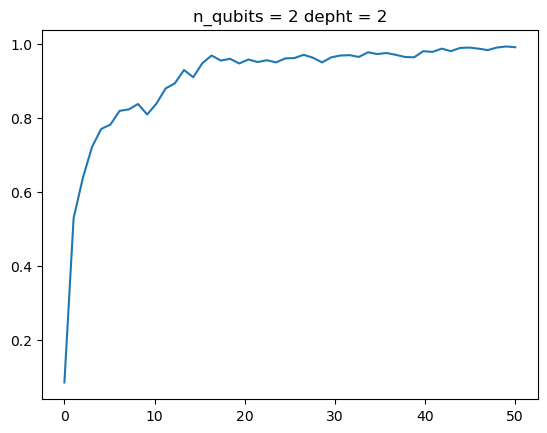

49 0.000344276428222648
Fidelidade =  0.9853515625000002


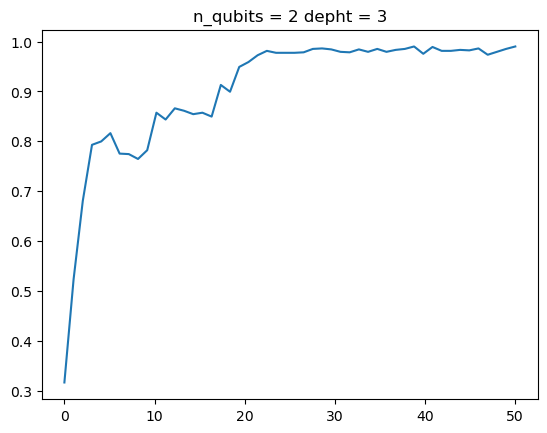

49 0.15642642974853516
Fidelidade =  0.625


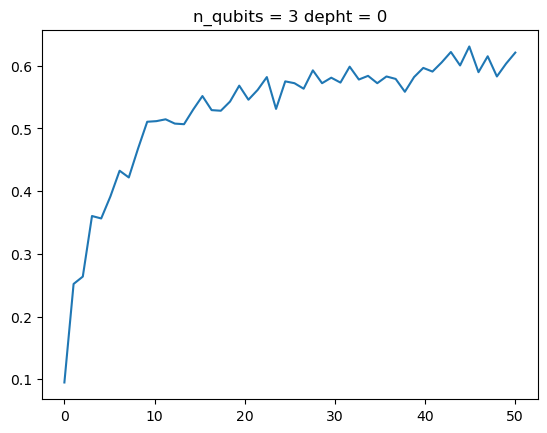

49 0.016366004943847656
Fidelidade =  0.89453125


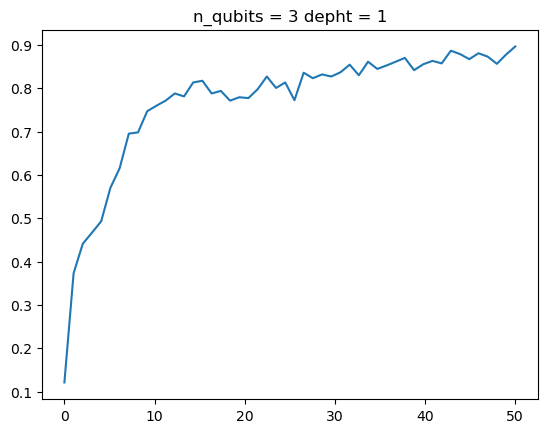

49 0.00018692016601561893
Fidelidade =  0.9843750000000002


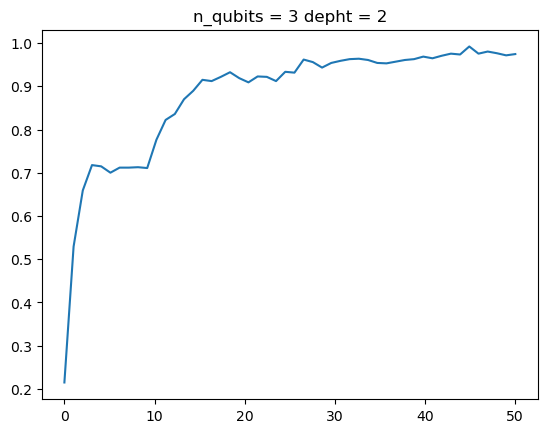

49 0.0006952285766601562
Fidelidade =  0.974609375


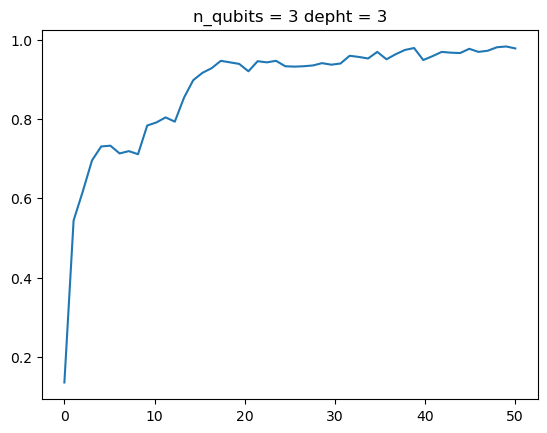

In [6]:
for m in range(1,4):
    for p in range(4):
        n_qubits = m
        depht = p
        n = 3*n_qubits*(1+depht)
        target_vector, alpha = init_state_rsvg(n_qubits)
        params = random_params(n)
        device = get_device(n_qubits)


        @qml.qnode(device, interface="torch")
        def circuit(params, M=None):
            w = []
            aux = 0
            for j in range(n_qubits):
                qml.RX(params[j+aux], wires=j)
                qml.RY(params[j+1+aux], wires=j)
                qml.RZ(params[j+2+aux], wires=j)
                w.append(j)
                aux+=2
            for z in range(depht):
                for i in range(n_qubits-1):
                    qml.CNOT(wires=[i,i+1])
                for j in range(n_qubits):
                    qml.RX(params[j+aux], wires=j)
                    qml.RY(params[j+1+aux], wires=j)
                    qml.RZ(params[j+2+aux], wires=j)
                    aux+=2
            return qml.expval(qml.Hermitian(M, wires=w))
        best_params, f = train(50, circuit, params, alpha)
        x = np.linspace(0,len(f),len(f))
        plt.plot(x,f)
        plt.title('n_qubits = {} depht = {}'.format(n_qubits, depht))
        print('Fidelidade = ',fidelidade(circuit, best_params, alpha))
        plt.show()
#fig, ax = qml.draw_mpl(circuit, decimals=2)(params, alpha)
#plt.show()

49 0.0021066665649414062
Fidelidade =  0.9511718749999999


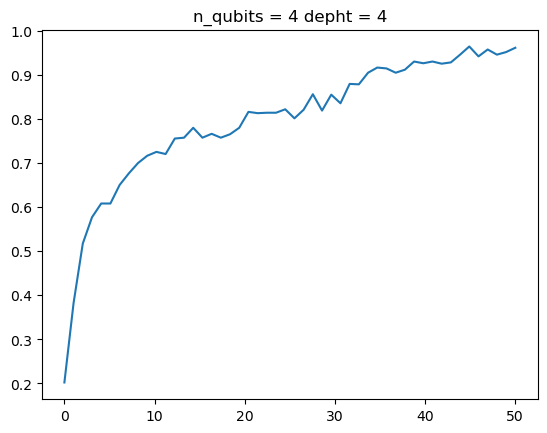

In [49]:
n_qubits = 4
depht = n_qubits+1
#n = 3*n_qubits*(1+depht)
n = 3*n_qubits*(2+n_qubits)
target_vector, alpha = init_state_rsvg(n_qubits)
params = random_params(n)
device = get_device(n_qubits)
@qml.qnode(device, interface="torch")
def circuit(params, M=None):
    w = []
    aux = 0
    for j in range(n_qubits):
        qml.RX(params[j+aux], wires=j)
        qml.RY(params[j+1+aux], wires=j)
        qml.RZ(params[j+2+aux], wires=j)
        w.append(j)
        aux+=2
    for z in range(depht):
        for i in range(n_qubits-1):
            qml.CNOT(wires=[i,i+1])
        for j in range(n_qubits):
            qml.RX(params[j+aux], wires=j)
            qml.RY(params[j+1+aux], wires=j)
            qml.RZ(params[j+2+aux], wires=j)
            aux+=2
    return qml.expval(qml.Hermitian(M, wires=w))
best_params, f = train(50, circuit, params, alpha)
x = np.linspace(0,len(f),len(f))
plt.plot(x,f)
plt.title('n_qubits = {} depht = {}'.format(n_qubits, depht))
print('Fidelidade = ',fidelidade(circuit, best_params, alpha))
plt.show()

In [51]:
import pickle
with open('best_params(n_qubit=4 depth=4).pkl', 'wb') as g:
    pickle.dump(best_params, g)

In [13]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from tools import *
import qiskit.quantum_info as qi
from qiskit.providers.aer import QasmSimulator


n_qubits = 4
depht = 0 # colocar n_qubits+1
n = 3*n_qubits*(1+depht)
target_vector, alpha = init_state_rsvg(n_qubits)
params = random_params(n)
params = params.detach().numpy()
device = get_device(n_qubits)
#best_params = # Obtido da função treino
#best_params = best_params.detach().numpy()

def qc_pos_train(params, M=None):
    w = []
    aux = 0
    qr = QuantumRegister(n_qubits)
    cr = ClassicalRegister(n_qubits)
    qc = QuantumCircuit(qr)#, cr)
    for j in range(n_qubits):
        qc.rx(params[j+aux], j)
        qc.ry(params[j+1+aux], j)
        qc.rz(params[j+2+aux], j)
        w.append(j)
        aux+=2
    for z in range(depht):
        for i in range(n_qubits-1):
            qc.cnot(i,i+1)
        for j in range(n_qubits):
            qc.rx(params[j+aux], j)
            qc.ry(params[j+1+aux], j)
            qc.rz(params[j+2+aux], j)
            aux+=2
    #qc.measure_all()
    return qc

qc = qc_pos_train(params)#,alpha)
#print(qc_pos_train(best_params,alpha))
stv1 = qi.Statevector.from_instruction(qc)
sim = QasmSimulator()
options = {'method': 'statevector'}
execute(qc, sim, backend_options=options)

print(stv1.probabilities)
#print(qc)
#qc.draw(output='mpl')

stv1.draw('latex')#, prefix='Statevector1:')




<bound method Statevector.probabilities of Statevector([ 0.10961279-0.34634731j,  0.05281984+0.11588052j,
              0.34104226-0.24721765j, -0.03069149+0.14443793j,
              0.08874576-0.2889372j ,  0.04476657+0.09603869j,
              0.28199705-0.20809979j, -0.02451272+0.12038973j,
              0.30358882-0.01816704j, -0.07474123+0.07603152j,
              0.29549392+0.19245275j, -0.12210262+0.01931709j,
              0.25245744-0.01726439j, -0.06164644+0.06378743j,
              0.24721367+0.1580287j , -0.10145268+0.01693632j],
            dims=(2, 2, 2, 2))>


<IPython.core.display.Latex object>

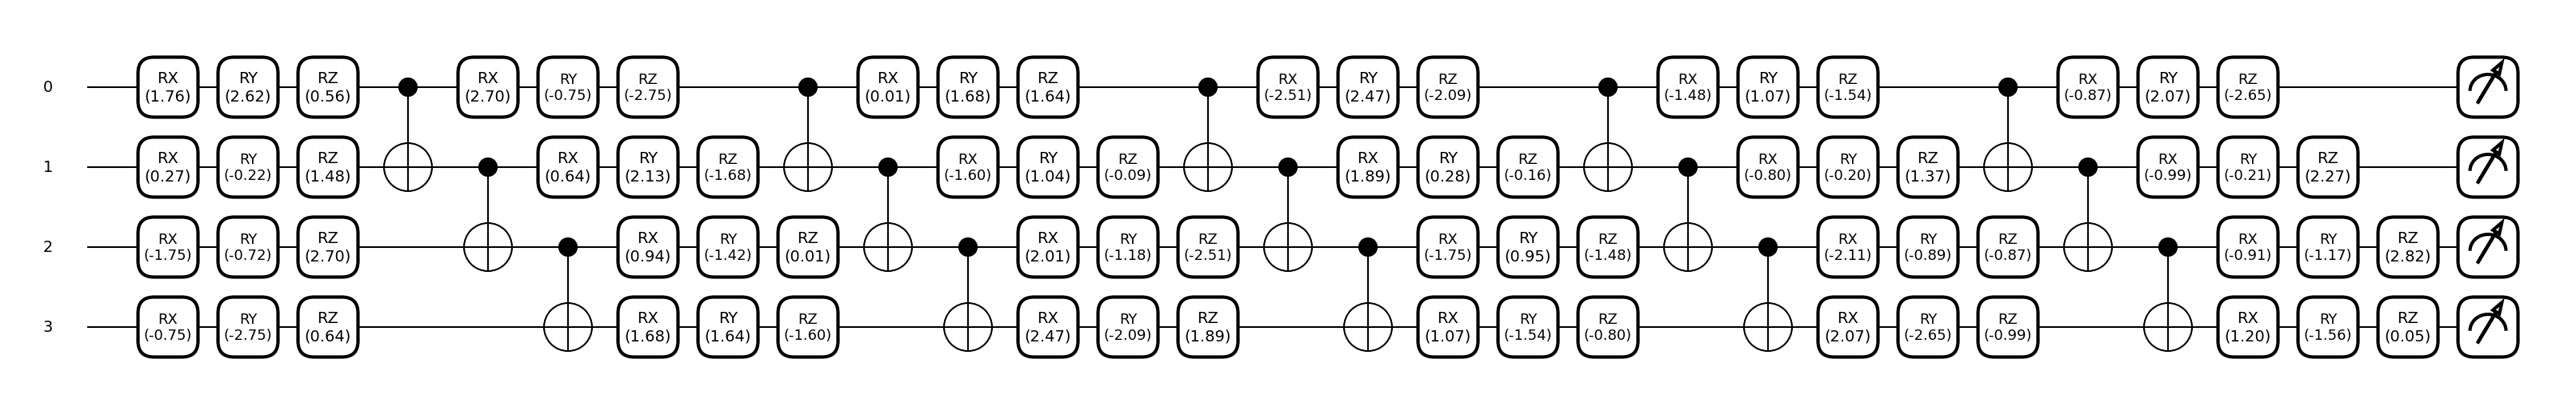

In [48]:
n_qubits = 4
depht = n_qubits + 1
n = 3*n_qubits*(1+depht)
target_vector, alpha = init_state_rsvg(n_qubits)
params = random_params(n)
device = get_device(n_qubits)
@qml.qnode(device, interface="torch")
def circuit(params, M=None):
    w = []
    aux = 0
    for j in range(n_qubits):
        qml.RX(params[j+aux], wires=j)
        qml.RY(params[j+1+aux], wires=j)
        qml.RZ(params[j+2+aux], wires=j)
        w.append(j)
        aux+=2
    for z in range(depht):
        for i in range(n_qubits-1):
            qml.CNOT(wires=[i,i+1])
        for j in range(n_qubits):
            qml.RX(params[j+aux], wires=j)
            qml.RY(params[j+1+aux], wires=j)
            qml.RZ(params[j+2+aux], wires=j)
            aux+=2
    return qml.expval(qml.Hermitian(M, wires=w))
fig, ax = qml.draw_mpl(circuit, decimals=2)(params, alpha)
plt.show()

In [55]:
backend = QasmSimulator()
backend_options = {'method': 'statevector'}
job = execute(qc, backend, backend_options=backend_options)
job_result = job.result()
print(job_result.get_statevector(qc))

QiskitError: 'No statevector for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fe452f73bb0>"'

In [5]:
device = get_device(n_qubits)

@qml.qnode(device, interface="torch")
def circuit_p(params, M=None):
    qml.Hadamard(wires=0)
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=0)
    qml.RZ(params[2], wires=0)
    
    qml.Hadamard(wires=1)
    qml.RY(params[3], wires=1)
    qml.RZ(params[4], wires=1)
    qml.RX(params[5], wires=1)
    qml.CNOT(wires=[0,1])
    qml.RX(params[6], wires=0)
    qml.RY(params[7], wires=0)
    qml.RZ(params[8], wires=0)

    qml.RY(params[9], wires=1)
    qml.RZ(params[10], wires=1)
    qml.RX(params[11], wires=1)
    return  qml.probs(wires=[0,1])
counts = circuit_p(best_params, M=alpha)
print(counts)
prepared_state = counts.detach().numpy()**0.5
#print(target_vector)
print(alpha.detach().numpy())
print('------------------------')
print(prepared_state)
print(np.outer(prepared_state,prepared_state))

tensor([0.5234, 0.2725, 0.1670, 0.0371], dtype=torch.float64,
       grad_fn=<SqueezeBackward0>)
[[ 0.37626711+0.j         -0.15759332+0.08571461j  0.19346076+0.10156826j
   0.10877248+0.02942129j]
 [-0.15759332-0.08571461j  0.35566765+0.j         -0.04106124-0.03506653j
   0.0588897 -0.02006553j]
 [ 0.19346076-0.10156826j -0.04106124+0.03506653j  0.15286316+0.j
   0.06808625-0.01383325j]
 [ 0.10877248-0.02942129j  0.0588897 +0.02006553j  0.06808625+0.01383325j
   0.11520208+0.j        ]]
------------------------
[0.72348981 0.52197791 0.40864678 0.19263794]
[[0.5234375  0.3776457  0.29565178 0.13937158]
 [0.3776457  0.27246094 0.21330459 0.10055275]
 [0.29565178 0.21330459 0.16699219 0.07872087]
 [0.13937158 0.10055275 0.07872087 0.03710937]]


# Iniciando o estado aleatório com rsvg

torch.Size([6])


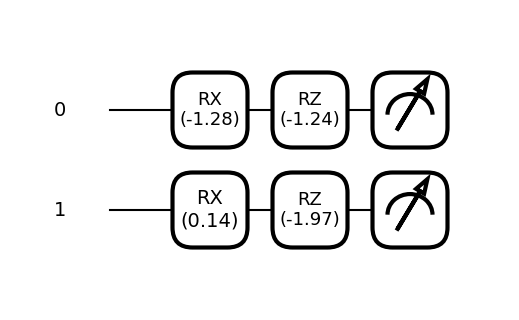

In [5]:
from tools import *
n_qubits = 2
depht = 0
#n = 3*n_qubits+depht*n_qubits*3
n = 3*n_qubits*(1+depht)
#alpha = init_state_rdm_ginibre(n_qubits)
target_vector, alpha = init_state_rsvg(n_qubits)

params = random_params(n)
print(np.shape(params))
device = get_device(n_qubits)

@qml.qnode(device, interface="torch")
def circuit(params, M=None):
    #n_qubits = 5
    #depht = 10
    #n = 6*n_qubits
    w = []

    aux = 0
    for j in range(n_qubits):
        qml.RX(params[j+aux], wires=j)
        #qml.RY(params[j+1+aux], wires=j)
        qml.RZ(params[j+2+aux], wires=j)
        w.append(j)
        aux+=2
    
    for z in range(depht):
        #print(z)
        for i in range(n_qubits-1):
            qml.CNOT(wires=[i,i+1])
        for j in range(n_qubits):
            qml.RX(params[j+aux], wires=j)
            #qml.RY(params[j+1+aux], wires=j)
            qml.RZ(params[j+2+aux], wires=j)
            aux+=2
        #for j in range(n_qubits):
        #    qml.RX(params[j+aux], wires=j)
        #    qml.RY(params[j+1+aux], wires=j)
        #    qml.RZ(params[j+2+aux], wires=j)
        #    aux+=2
        #for i in range(n_qubits-1):
        #    qml.CNOT(wires=[i,i+1])
        #for j in range(n_qubits):
        #    qml.RX(params[j+aux], wires=j)
        #    qml.RY(params[j+1+aux], wires=j)
        #    qml.RZ(params[j+2+aux], wires=j)
        #    aux+=2
    return qml.expval(qml.Hermitian(M, wires=w))
fig, ax = qml.draw_mpl(circuit, decimals=2)(params, alpha)
plt.show()

49 0.015140533447265625


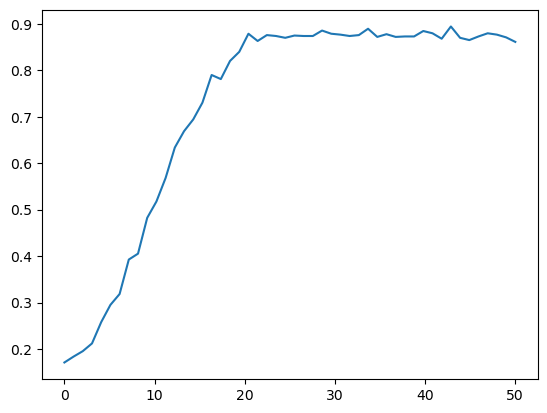

In [6]:
best_params, f = train(50, circuit, params, alpha)
x = np.linspace(0,len(f),len(f))
plt.plot(x,f)
plt.show()

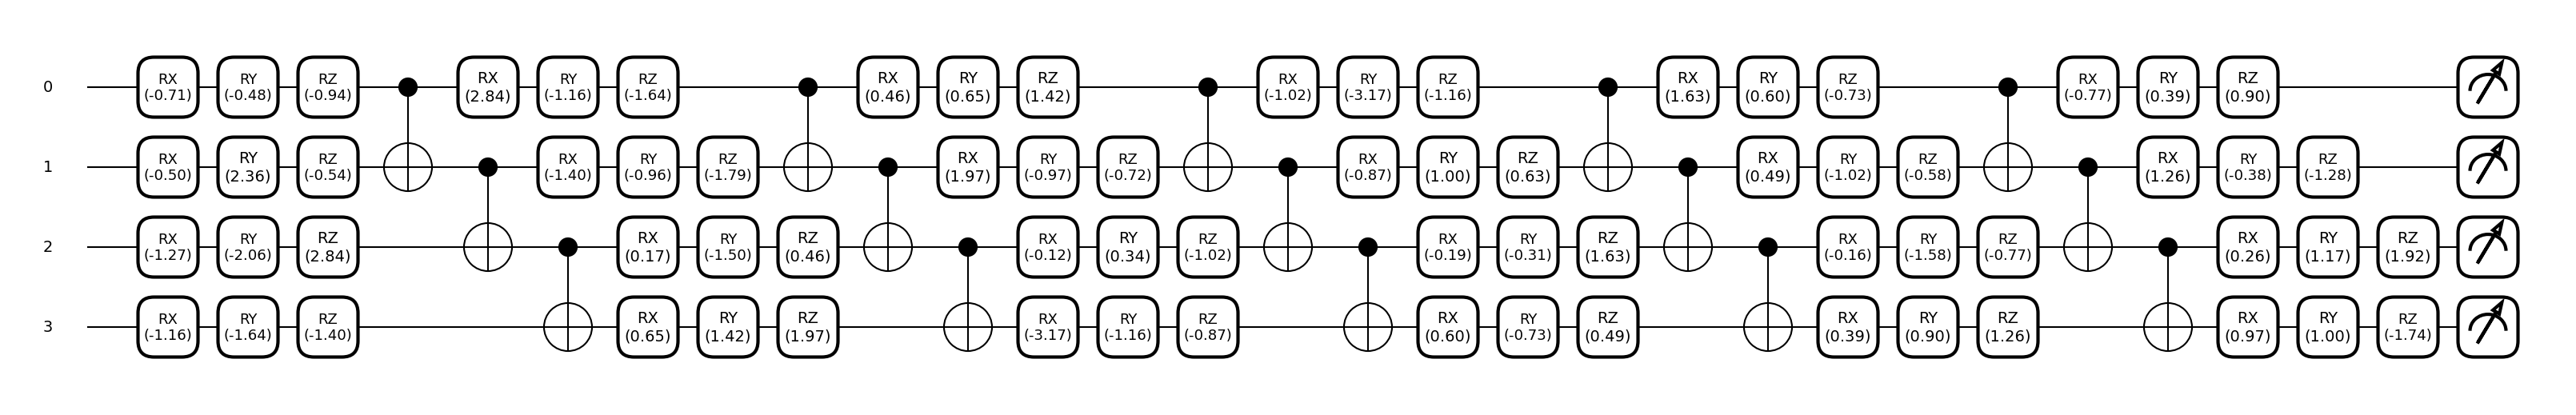

In [5]:
from tools import *
n_qubits = 4
depht = 5
#n = 3*n_qubits+depht*n_qubits*3
n_params = 3*n_qubits*(1+depht)
#alpha = init_state_rdm_ginibre(n_qubits)
target_vector, alpha = init_state_rsvg(n_qubits)

params = random_params(n)
#print(np.shape(params))
device = get_device(n_qubits)

@qml.qnode(device, interface="torch")
def circuit(params, M=None):
    #n_qubits = 5
    #depht = 10
    #n = 6*n_qubits
    w = []

    aux = 0
    for j in range(n_qubits):
        qml.RX(params[j+aux], wires=j)
        qml.RY(params[j+1+aux], wires=j)
        qml.RZ(params[j+2+aux], wires=j)
        w.append(j)
        aux+=2
    
    for z in range(depht):
        for i in range(n_qubits-1):
            qml.CNOT(wires=[i,i+1])
        for j in range(n_qubits):
            qml.RX(params[j+aux], wires=j)
            qml.RY(params[j+1+aux], wires=j)
            qml.RZ(params[j+2+aux], wires=j)
            aux+=2
        #for j in range(n_qubits):
        #    qml.RX(params[j+aux], wires=j)
        #    qml.RY(params[j+1+aux], wires=j)
        #    qml.RZ(params[j+2+aux], wires=j)
        #    aux+=2
        #for i in range(n_qubits-1):
        #    qml.CNOT(wires=[i,i+1])
        #for j in range(n_qubits):
        #    qml.RX(params[j+aux], wires=j)
        #    qml.RY(params[j+1+aux], wires=j)
        #    qml.RZ(params[j+2+aux], wires=j)
        #    aux+=2
    return qml.expval(qml.Hermitian(M, wires=w))
fig, ax = qml.draw_mpl(circuit, decimals=2)(params, alpha)
plt.show()

0 0.98443603515625
1 0.7622108459472656
2 0.46596622467041016
3 0.3001413345336914
4 0.15106582641601562
5 0.11154556274414062
6 0.0753030776977539
7 0.0726470947265625
8 0.058182716369628906
9 0.06798648834228516
10 0.0700387954711914
11 0.052666664123535156
12 0.050889015197753906
13 0.031937599182128906
14 0.019501686096191406
15 0.024109840393066406
16 0.016117095947265625
17 0.013278961181640625
18 0.0166168212890625
19 0.011539459228515625
20 0.012612342834472656
21 0.007218360900878906
22 0.005082130432128906
23 0.005364418029785156
24 0.006569862365722656
25 0.004029273986816406
26 0.005654335021972656
27 0.0025787353515625
28 0.0030984878540039062
29 0.0012359619140625
30 0.00152587890625
31 0.0012359619140625
32 0.0011682510375976562
33 0.0005960464477539062
34 0.001377105712890625
35 0.0012359619140625
36 0.0018463134765625
37 0.0010385513305664062
38 0.001102447509765625
39 0.0013055801391601562
40 0.001102447509765625
41 0.0009164810180664062
42 0.000644683837890625
43 0.0

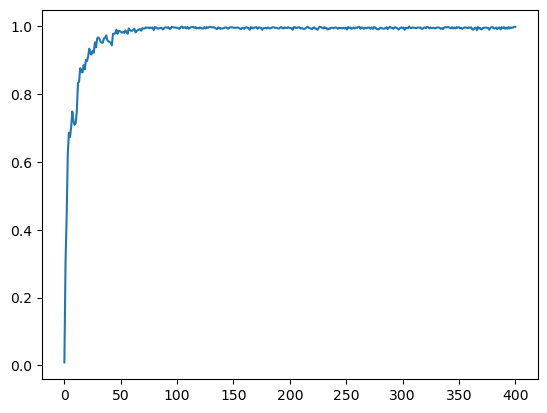

In [6]:
best_params, f = train(400, circuit, params, alpha)
x = np.linspace(0,len(f),len(f))
plt.plot(x,f)
plt.show()

In [7]:
import pickle
with open('best_params.pkl', 'wb') as g:
    pickle.dump(best_params, g)

In [8]:
print('Fidelidade = ',fidelidade(circuit, best_params, alpha))

Fidelidade =  0.9990234375


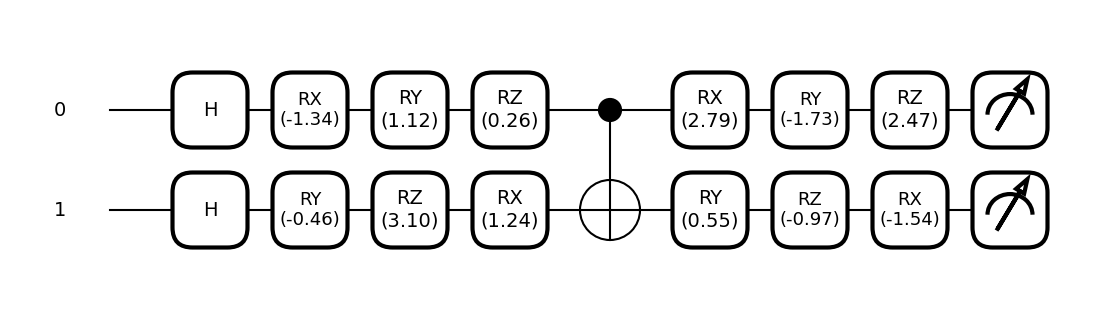

In [4]:
n_qubits = 2
n = 6*n_qubits
target_vector, alpha = init_state_rsvg(n_qubits)

params = random_params(n)
device = get_device(n_qubits)

@qml.qnode(device, interface="torch")
def circuit(params, M=None):
    qml.Hadamard(wires=0)
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=0)
    qml.RZ(params[2], wires=0)
    
    qml.Hadamard(wires=1)
    qml.RY(params[3], wires=1)
    qml.RZ(params[4], wires=1)
    qml.RX(params[5], wires=1)
    qml.CNOT(wires=[0,1])
    qml.RX(params[6], wires=0)
    qml.RY(params[7], wires=0)
    qml.RZ(params[8], wires=0)

    qml.RY(params[9], wires=1)
    qml.RZ(params[10], wires=1)
    qml.RX(params[11], wires=1)
    return qml.expval(qml.Hermitian(M, wires=[0,1]))
#drawer = qml.draw(circuit)
fig, ax = qml.draw_mpl(circuit, decimals=2)(params, alpha)
plt.show()

0 0.7004251480102539
1 0.46596622467041016
2 0.289536476135254
3 0.20092105865478527
4 0.08640384674072273
5 0.03552341461181645
6 0.021457672119140656
7 0.00807189941406252
8 0.004807472229003922
9 0.007053375244140644
10 0.008248329162597677
11 0.013962745666503932
12 0.016869544982910184
13 0.02088928222656253
14 0.018959999084472687
15 0.021457672119140656
16 0.01869201660156253
17 0.013732910156250026
18 0.014663696289062528
19 0.011962890625000024
20 0.009922027587890648
21 0.008426666259765646
22 0.00878906250000002
23 0.007385253906250019
24 0.009922027587890648
25 0.0065698623657226745
26 0.004943847656250016
27 0.004540443420410171
28 0.004807472229003922
29 0.0035486221313476697
30 0.0021066665649414167
31 0.0025787353515625113
32 0.001931190490722666
33 0.0025787353515625113
34 0.002017974853515635
35 0.0015258789062500087
36 0.0010385513305664134
37 0.000916481018066413
38 0.0007476806640625061
39 0.00034427642822266037
40 0.00034427642822266037
41 0.00034427642822266037
4

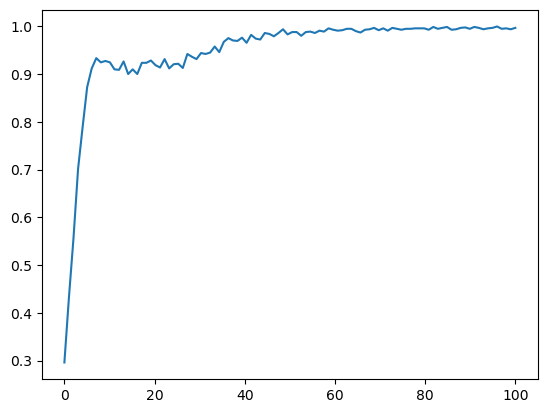

In [5]:
best_params, f = train(100, circuit, params, alpha)
x = np.linspace(0,len(f),len(f))
plt.plot(x,f)
plt.show()

In [11]:
print('Fidelidade = ',fidelidade(circuit, best_params, alpha))

Fidelidade =  0.9951171874999999


In [12]:
device = get_device(n_qubits)

@qml.qnode(device, interface="torch")
def circuit_p(params, M=None):
    qml.Hadamard(wires=0)
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=0)
    qml.RZ(params[2], wires=0)
    
    qml.Hadamard(wires=1)
    qml.RY(params[3], wires=1)
    qml.RZ(params[4], wires=1)
    qml.RX(params[5], wires=1)
    qml.CNOT(wires=[0,1])
    qml.RX(params[6], wires=0)
    qml.RY(params[7], wires=0)
    qml.RZ(params[8], wires=0)

    qml.RY(params[9], wires=1)
    qml.RZ(params[10], wires=1)
    qml.RX(params[11], wires=1)
    return  qml.probs(wires=[0,1])
counts = circuit_p(best_params, M=alpha)
print(counts)
prepared_state = counts.detach().numpy()**0.5
print(target_vector)
print(alpha.detach().numpy())
print('------------------------')
print(prepared_state)
print(np.outer(prepared_state,prepared_state))

tensor([0.1953, 0.0859, 0.4443, 0.2744], dtype=torch.float64,
       grad_fn=<SqueezeBackward0>)
[-0.10418639+0.44250651j -0.13166609-0.18125312j  0.04999019+0.65957495j
 -0.45022131-0.32079148j]
[[ 0.20666682+0.j         -0.06648787+0.07714721j  0.28665791-0.09083972j
  -0.09504539+0.23264797j]
 [-0.06648787-0.07714721j  0.05018865+0.j         -0.12613203-0.07778277j
   0.11742333-0.03936666j]
 [ 0.28665791+0.09083972j -0.12613203+0.07778277j  0.43753813+0.j
  -0.23409267+0.28091827j]
 [-0.09504539-0.23264797j  0.11742333+0.03936666j -0.23409267-0.28091827j
   0.3056064 +0.j        ]]
------------------------
[0.44194174 0.29315098 0.66658528 0.52384546]
[[0.1953125  0.12955566 0.29459186 0.23150917]
 [0.12955566 0.0859375  0.19541013 0.15356581]
 [0.29459186 0.19541013 0.44433594 0.34918767]
 [0.23150917 0.15356581 0.34918767 0.27441406]]


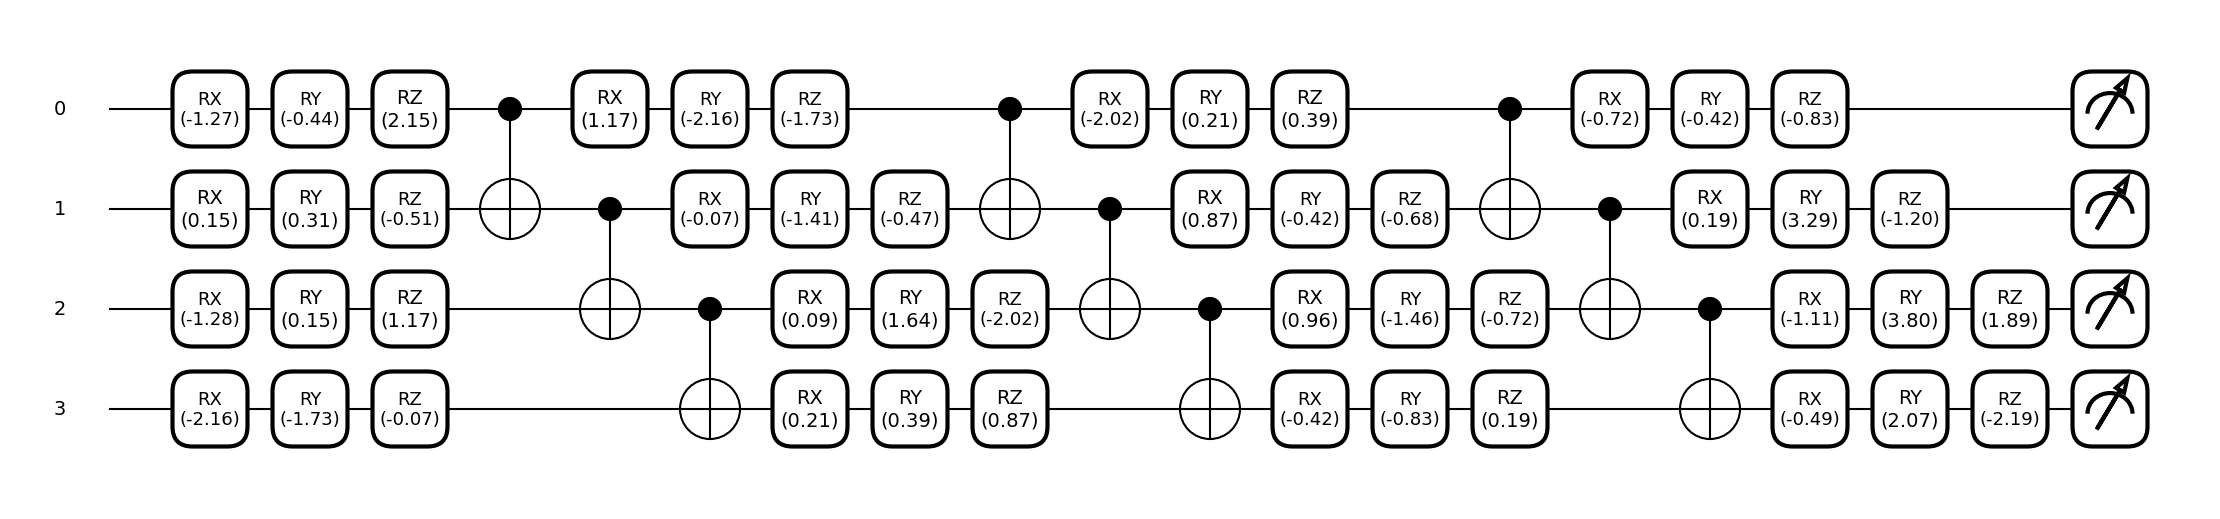

In [23]:
n_qubits = 4
n = 6*n_qubits
#alpha = init_state_rdm_ginibre(n_qubits)
target_vector, alpha = init_state_rsvg(n_qubits)

params = random_params(n+24)
device = get_device(n_qubits)

@qml.qnode(device, interface="torch")
def circuit(params, M=None):
    #n_qubits = 5
    n = 6*n_qubits
    w = []

    for i in range(n_qubits):
    #    qml.Hadamard(wires=i)
        w.append(i)

    aux = 0
    for j in range(n_qubits):
        qml.RX(params[j+aux], wires=j)
        qml.RY(params[j+1+aux], wires=j)
        qml.RZ(params[j+2+aux], wires=j)
        aux+=2
    for i in range(n_qubits-1):
        qml.CNOT(wires=[i,i+1])
    for j in range(n_qubits):
        qml.RX(params[j+aux], wires=j)
        qml.RY(params[j+1+aux], wires=j)
        qml.RZ(params[j+2+aux], wires=j)
        aux+=2
    for i in range(n_qubits-1):
        qml.CNOT(wires=[i,i+1])
    for j in range(n_qubits):
        qml.RX(params[j+aux], wires=j)
        qml.RY(params[j+1+aux], wires=j)
        qml.RZ(params[j+2+aux], wires=j)
        aux+=2
    for i in range(n_qubits-1):
        qml.CNOT(wires=[i,i+1])
    for j in range(n_qubits):
        qml.RX(params[j+aux], wires=j)
        qml.RY(params[j+1+aux], wires=j)
        qml.RZ(params[j+2+aux], wires=j)
        aux+=2
    return qml.expval(qml.Hermitian(M, wires=w))
fig, ax = qml.draw_mpl(circuit, decimals=2)(params, alpha)
plt.show()


0 0.9441614151000977
1 0.7862701416015627
2 0.6428155899047855
3 0.5876779556274417
4 0.4566802978515628
5 0.3120269775390629
6 0.22711181640625042
7 0.15106582641601596
8 0.16424655914306677
9 0.19397830963134804
10 0.18045902252197304
11 0.18212223052978554
12 0.16903018951416052
13 0.1326837539672855
14 0.10011291503906278
15 0.08412265777587917
16 0.0964393615722659
17 0.06952285766601586
18 0.05088901519775411
19 0.042057037353515805
20 0.031243324279785312
21 0.028542518615722805
22 0.03406620025634782
23 0.04165744781494159
24 0.027886390686035305
25 0.023208618164062635
26 0.02350711822509779
27 0.02261734008789076
28 0.017380714416504024
29 0.010514259338378998
30 0.0128326416015626
31 0.008248329162597738
32 0.006103515625000069
33 0.007724761962890703
34 0.005222320556640689
35 0.007724761962890703
36 0.005951881408691475
37 0.005802154541015693
38 0.00807189941406258
39 0.003785133361816461
40 0.005654335021972723
41 0.00508213043212897
42 0.004281044006347714
43 0.00480747

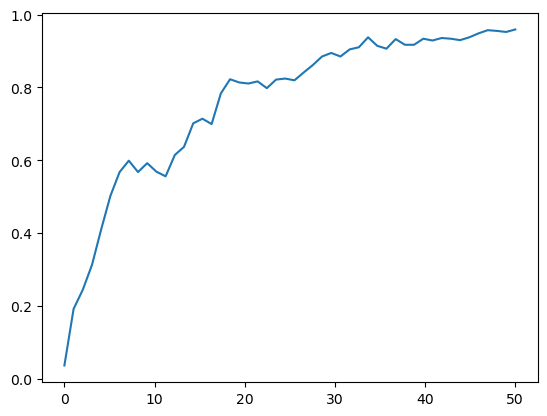

In [24]:
best_params, f = train(50, circuit, params, alpha)
x = np.linspace(0,len(f),len(f))
plt.plot(x,f)
plt.show()

In [25]:
print('Fidelidade = ',fidelidade(circuit, best_params, alpha))

Fidelidade =  0.9628906249999996


In [6]:
n_qubits = 5
device = get_device(n_qubits)

@qml.qnode(device, interface="torch")
def circuit_p(params, M=None):
    #n_qubits = 5
    n = 6*n_qubits
    w = []

    for i in range(n_qubits):
        qml.Hadamard(wires=i)
        w.append(i)

    aux = 0
    for j in range(n_qubits):
        qml.RX(params[j+aux], wires=j)
        qml.RY(params[j+1+aux], wires=j)
        qml.RZ(params[j+2+aux], wires=j)
        aux+=2
    for i in range(n_qubits-1):
        qml.CNOT(wires=[i,i+1])
    for j in range(n_qubits):
        qml.RX(params[j+aux], wires=j)
        qml.RY(params[j+1+aux], wires=j)
        qml.RZ(params[j+2+aux], wires=j)
        aux+=2
    
    return  qml.probs(wires=w)

counts = circuit_p(best_params, M=alpha)
print(counts)
prepared_state = counts.detach().numpy()**0.5
print(target_vector)
print(alpha.detach().numpy())
print('------------------------')
print(prepared_state)
print(np.outer(prepared_state,prepared_state))

IndexError: index 18 is out of bounds for dimension 0 with size 18